In [58]:
track_pos = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
slope = [1]*100

In [63]:
import numpy as np
import control as ct 
import control.optimal as obc
import matplotlib.pyplot as plt
from math import pi


def bicycle_update(t, x, u, params={}):
    """Bicycle dynamics for control system.
    
    Parameters
    ----------
    x : array
            System state: [position, velocity, remaining anaerobic capacity]
    u : array
            System input: [power]

    Returns
    ----------
    float
        Bicycle acceleration 
    """


    # System parameters
    m = params.get('m', 80)
    g = params.get('g', 9.81)
    my = params.get('my', 0.004)
    b0 = params.get('b0', 0.091)
    b1 = params.get('b1', 0.0087)
    Iw = params.get('Iw', 0.14)
    r = params.get('r', 0.33)
    Cd = params.get('Cd', 0.7)
    rho = params.get('rho', 1.2)
    A = params.get('A', 0.4)
    eta = params.get('eta', 1)
    w_prime = params.get('w_prime', 26630)
    cp = params.get('cp', 265)

    # Variables for states and input
    pos = x[0]
    v = x[1]
    w_bal = x[2]
    power = u[0]
    
    dw_bal = 0
    new = 0
    if power < cp:
        new = w_prime - (w_prime - w_bal) * np.power(np.e, -(cp - power)/w_prime)
        dw_bal = w_bal + new
    else:
        new = w_bal - (power - cp)
        dw_bal = w_bal - new
    
    
    print("t: ", t)
    print("slope: ", slope[int(t)])

    dv = 1/(m*v**2) * (eta*power - m*g*v*slope[int(t)] - b0*v - b1*v**2 - 0.5*Cd*rho*A*v**3)
    
    return np.array([v, dv, dw_bal])

def bicycle_output(t, x, u, params):
    return x

bicycle_system = ct.NonlinearIOSystem(bicycle_update, bicycle_output, states=3, name='bicycle', inputs=('u'), outputs=('p', 'v', 'w_bal'))

In [64]:
u = [400]*100
t = np.arange(100)
print(t)

response = ct.input_output_response(bicycle_system, t, u, [0, 0.1, 20000])
t, y, u = response.time, response.outputs, response.inputs

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
t:  0.0
slope:  1
t:  3.5354438970525456e-06
slope:  1
t:  7.070887794105091e-05
slope:  1
t:  0.00010606331691157637
slope:  1
t:  0.00028283551176420366
slope:  1
t:  0.00031426167973800403
slope:  1
t:  0.00035354438970525457
slope:  1
t:  0.00035354438970525457
slope:  1
t:  5.463678858360511e-05
slope:  1
t:  8.195518287540766e-05
slope:  1
t:  0.00021854715433442044
slope:  1
t:  0.00024283017148268935
slope:  1
t:  0.00027318394291802554
slope:  1
t:  0.00027318394291802554
slope:  1
t:  4.885596085062941e-05
slope:  1
t:  7.328394127594411e-05
slope:  1
t:  0.00019542384340251763
slope:  1
t:  0.0002171376037805751
slope:  1
t:  0.000244279804253147
slope:  1
t:  0.000244279804

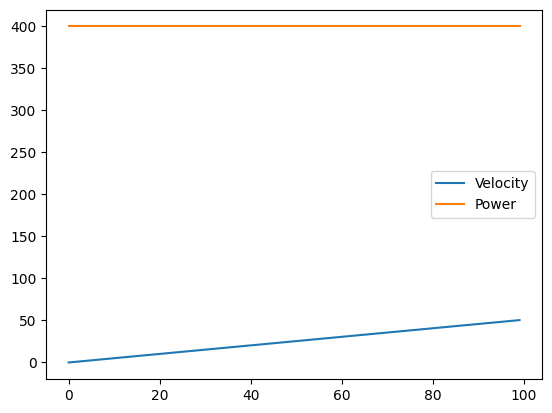

In [65]:
plt.plot(t, y[0])
plt.plot(t, u[0])
plt.legend(["Velocity", "Power"])
plt.show()

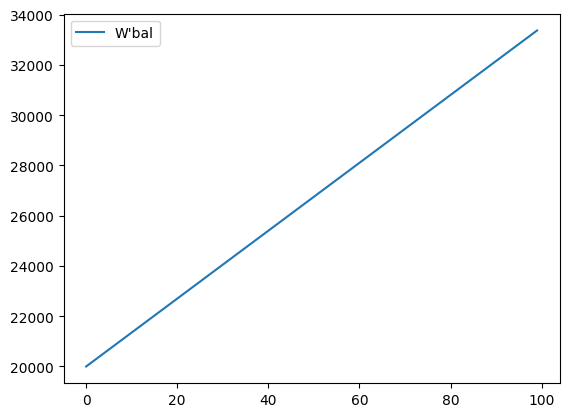

In [66]:
plt.plot(t, y[2])
plt.legend(["W'bal"])
plt.show()